In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
names = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromating','Normal Nucleoli','Mitoses','Class']

In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data',delimiter=',', names=names)
df.to_csv('breast-cancer-wisconsin.csv', index = False)

In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.csv',index_col = 0)

In [ ]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromating',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromating,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromating             699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [ ]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace(to_replace="?",
           value=np.nan)

In [ ]:
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromating                0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
#we replace ? with nan to create null values
df = df.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              683 non-null    int64 
 1   Uniformity of Cell Size      683 non-null    int64 
 2   Uniformity of Cell Shape     683 non-null    int64 
 3   Marginal Adhesion            683 non-null    int64 
 4   Single Epithelial Cell Size  683 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromating             683 non-null    int64 
 7   Normal Nucleoli              683 non-null    int64 
 8   Mitoses                      683 non-null    int64 
 9   Class                        683 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [ ]:
#now we convert object to int
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [ ]:
df['Uniformity of Cell Shape'] = (df['Uniformity of Cell Shape']+df['Uniformity of Cell Size'])/2
df.rename(columns = {'Uniformity of Cell Shape':'Uniformity'}, inplace = True)
df = df.drop(['Uniformity of Cell Size','Mitoses'],axis=1)

In [ ]:
corr = df.corr()
corr

,Clump Thickness,Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromating,Normal Nucleoli,Class
Clump Thickness,1.000000,0.663474,0.487829,0.523596,0.593091,0.553742,0.534066,0.714790
Uniformity,0.663474,1.000000,0.713334,0.755937,0.719537,0.763494,0.735932,0.841075
Marginal Adhesion,0.487829,0.713334,1.000000,0.594548,0.670648,0.668567,0.603121,0.706294
Single Epithelial Cell Size,0.523596,0.755937,0.594548,1.000000,0.585716,0.618128,0.628926,0.690958
Bare Nuclei,0.593091,0.719537,0.670648,0.585716,1.000000,0.680615,0.584280,0.822696
Bland Chromating,0.553742,0.763494,0.668567,0.618128,0.680615,1.000000,0.665602,0.758228
Normal Nucleoli,0.534066,0.735932,0.603121,0.628926,0.584280,0.665602,1.000000,0.718677
Class,0.714790,0.841075,0.706294,0.690958,0.822696,0.758228,0.718677,1.000000


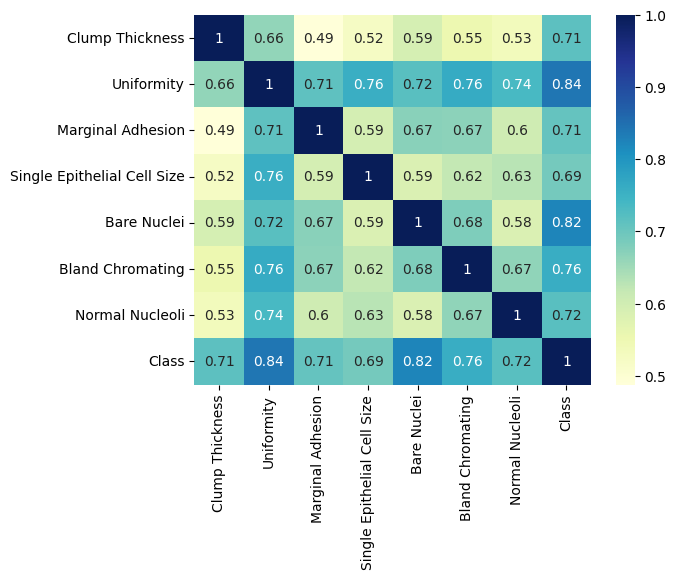

In [ ]:
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('Class',axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.9270073 , 0.94160584, 0.98540146, 0.97794118, 0.98529412])

In [ ]:
clf.fit(X_train,y_train)
y_pred_class = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

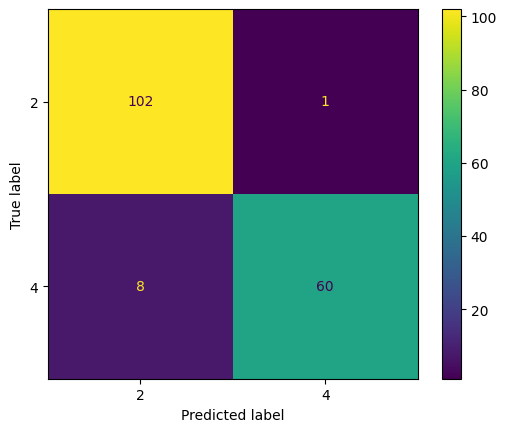

In [ ]:
cm = confusion_matrix(y_test, y_pred_class, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print (accuracy_score(y_test,y_pred_class))

0.9473684210526315


In [ ]:
print (classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           2       0.93      0.99      0.96       103
           4       0.98      0.88      0.93        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
y_pred_class.shape

(171,)

In [ ]:
X_test.shape

(171, 7)

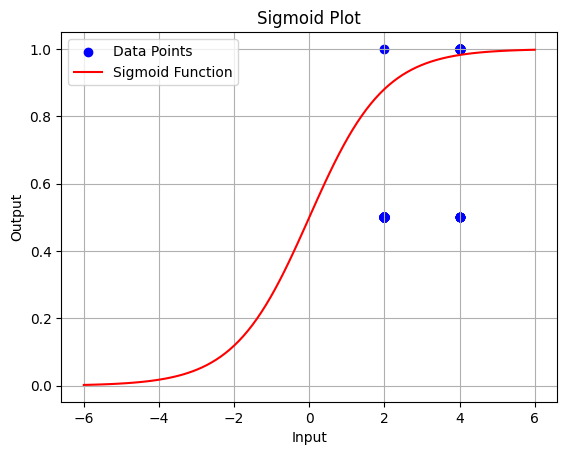

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting
plt.scatter(y_test, y_pred_class/4, color='blue', label='Data Points')#we normalize the points as x/4
x = np.linspace(-(min(y_test)+max(y_test)), min(y_test)+max(y_test), 100)
y = sigmoid(x)
plt.plot(x, y, color='red', label='Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(theta, X, y, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for iteration in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta = theta - learning_rate * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

theta = np.zeros((X_test.shape[1], 1))
learning_rate = 0.01
num_iterations = 1000
theta_optimized, cost_history = gradient_descent(theta, X, y, learning_rate, num_iterations)

# Print the optimized parameters
print("Optimized Parameters:")
print(theta_optimized)

# Print the cost history
print("Cost History:")
print(cost_history)

Optimized Parameters:
[[-0.51798946 -0.50184642 -0.4862143  -0.47128537 -0.4572325  -0.44420399
  -0.43231719 -0.42165083 -0.41223694 -0.40405414 -0.39701644 -0.39093257
  -0.38540954 -0.37978941 -0.37334616 -0.36568648 -0.3569198  -0.34747088
  -0.33780135 -0.32824224 -0.31895753 -0.30998262 -0.30128117 -0.29278832
  -0.28443224 -0.27613976 -0.26783523 -0.25943967 -0.25087292 -0.24205902
  -0.23293267 -0.22344469 -0.2135649  -0.20328181 -0.19260022 -0.18153784
  -0.1701221  -0.15838752 -0.1463735  -0.1341223  -0.12167716 -0.10908032
  -0.09637124 -0.08358489 -0.07075052 -0.05789085 -0.04502185 -0.03215315
  -0.00944715  0.00728545 -0.00728545  0.00944715  0.03215315  0.04502185
   0.05789085  0.07075052  0.08358489  0.09637124  0.10908032  0.12167716
   0.1341223   0.1463735   0.15838752  0.1701221   0.18153784  0.19260022
   0.20328181  0.2135649   0.22344469  0.23293267  0.24205902  0.25087292
   0.25943967  0.26783523  0.27613976  0.28443224  0.29278832  0.30128117
   0.30998262  0

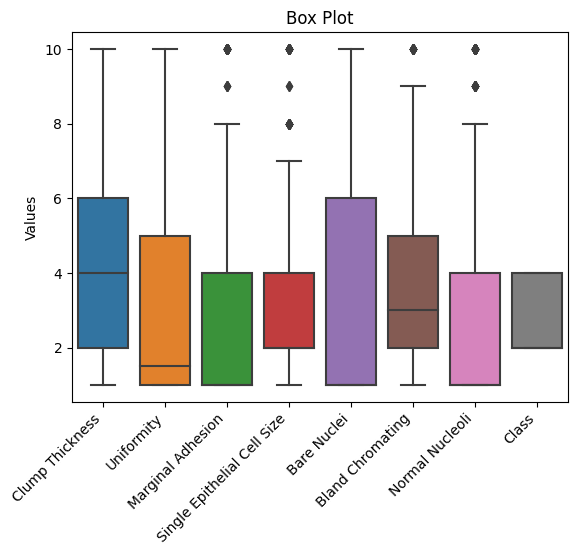

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

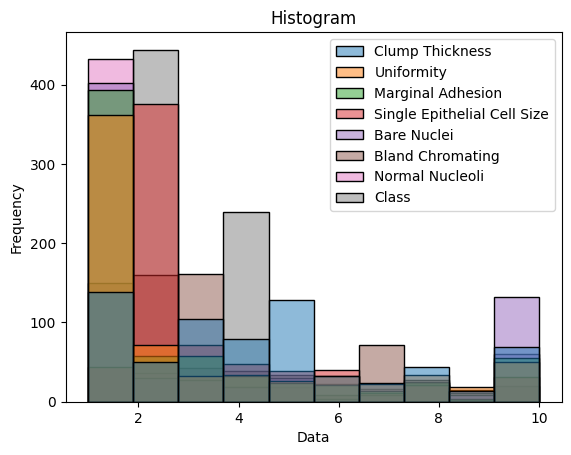

In [ ]:
sns.histplot(data=df, bins=10)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()